# **Evaluacion de Riesgo Crediticio**

##---------------------Indice---------------------
1. Introduccion
2. Dataset
3. Definicion de tematica
4. Glosario
5. Presentacion del Dataset y Analisis Exploratorio
6. Análisis Exploratorio de Datos (EDA)

  6.1 Grafico de calor

  6.2. Distribución de Estados de Préstamos por Propósito de Solicitud

  6.3. Comparación del Monto de Préstamos Según el Tipo de Propiedad del Solicitante

  6.4. Análisis de la Distribución de Préstamos por Grado Crediticio y Estado del Préstamo

  6.5. Comparación del Ingreso Anual Promedio Según el Grado Crediticio

  6.6 Distribución de Montos de Préstamo Según el Estado Actual del Préstamo

  6.7. Distribución de los Estados de Préstamo en Porcentajes

  6.8. Histograma de la Distribución del Ratio Deuda-Ingreso (DTI) de los Prestatarios
7. Modelado con Análisis de Componentes Principales (PCA)
8. Modelos de Machine Learning
9. Conclusión del Proyecto de Evaluación de Riesgo Crediticio



# *1. Introducción: Evaluación del Riesgo Crediticio*

En el mundo financiero actual, la capacidad para predecir el riesgo de crédito de manera precisa no solo es una ventaja competitiva para bancos e instituciones financieras, sino una necesidad imperativa. Este proyecto se adentra en esta dinámica, utilizando un conjunto de datos para evaluar el riesgo crediticio de los solicitantes de préstamos. A través de este análisis, se busca transformar la forma en que las entidades financieras perciben y manejan el potencial de incumplimiento, utilizando algoritmos de predicción que consideran una diversidad de características y comportamientos financieros. Al comprender mejor quién es más probable que incumpla un préstamo, las instituciones pueden tomar decisiones más informadas, minimizando riesgos y fortaleciendo su estabilidad financiera. A continuacion, veremos cómo mejorar la gestión de crédito de manera más inteligente y segura.

# *2. Descripcion del Dataset*

La base de este proyecto es un dataset, almacenado en formato CSV, que ofrece una ventana al mundo de las solicitudes de préstamos. Estos datos no solo registran cantidades y razones detrás de cada solicitud de préstamo, sino que también detalla el perfil socioeconómico de cada solicitante, incluyendo el grado crediticio y el tipo de vivienda que posee. Con variables que van desde aspectos financieros básicos hasta indicadores más complejos de comportamiento crediticio, este dataset proporciona las herramientas necesarias para una evaluación profunda y combinada del riesgo crediticio.

Al analizar las interacciones entre estas variables, nos equipamos mejor para identificar patrones y tendencias que pueden predecir el comportamiento de pago futuro de los solicitantes. Este enfoque no solo eleva la precisión de nuestras predicciones, sino que también abre nuevas avenidas para estrategias de préstamo más inclusivas y justas.


# *3. Definición de la Temática e Hipótesis*

En el núcleo de este proyecto se encuentra una hipótesis central que busca explorar las dinámicas detrás del incumplimiento de préstamos. Basándonos en la observación y en teorías previas, se propone que ciertos factores económicos y financieros pueden ser indicativos de un mayor riesgo de incumplimiento. En concreto, anticipamos que los prestatarios con calificaciones crediticias más bajas, ingresos anuales reducidos, altas relaciones deuda-ingreso (DTI), montos de préstamo elevados, cuotas mensuales más altas, tasas de interés más onerosas, y menor estabilidad en la propiedad de la vivienda presentan una probabilidad significativamente mayor de no cumplir con sus obligaciones de préstamo.

Esta hipótesis no solo guía la dirección de este análisis, sino que también nos permite focalizar en aspectos específicos de los datos que pueden tener un impacto sustancial en la viabilidad financiera de las instituciones crediticias. Al confirmar o refutar esta hipótesis, nuestro estudio contribuirá a una comprensión más profunda de cómo y por qué algunos prestatarios se vuelven incumplidores, lo cual es crucial para desarrollar estrategias más eficaces en la gestión del riesgo crediticio.

# *4. Glosario*

DTI (Índice Deuda-Ingreso): Este índice financiero es crucial para evaluar la solvencia crediticia de los prestatarios. El DTI compara los pagos mensuales totales de la deuda con el ingreso mensual total del prestatario, ofreciendo una medida directa de la carga financiera que enfrenta. Un DTI más alto indica una mayor proporción de deuda respecto al ingreso, lo cual es un factor predictivo clave en nuestra evaluación del riesgo de incumplimiento del préstamo.

Grados de Riesgo: Los grados asignados a los préstamos varían desde 'A' para prestatarios de bajo riesgo hasta 'G' para aquellos considerados de alto riesgo. Este sistema de clasificación no solo afecta la percepción del riesgo, sino que también determina las tasas de interés aplicadas: a mayor riesgo, mayor es la tasa de interés. Esta correlación permite a los prestamistas compensar el riesgo adicional asumido al prestar a individuos con mayores probabilidades de incumplimiento.

# 5. Presentacion del Dataset y Analisis Exploratorio

Configuración Inicial: Importación de Librerías

In [ ]:
# Importación de librerías básicas para manejo de datos y cálculos
import numpy as np
import pandas as pd

# Importación de librerías para visualización de datos
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Preprocesamiento y Modelado

In [ ]:
# Configuración de estilo de gráficos
from matplotlib import style
style.use('ggplot')  # Aplicación del estilo 'ggplot' para gráficos

# Librerías para análisis estadístico
import statsmodels.api as sm

# Configuración para suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

# Herramientas para el preprocesamiento y modelado
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, scale, label_binarize
import xgboost as xgb
from xgboost import XGBClassifier

# Otras utilidades
from collections import Counter


Importacion del Dataset

In [ ]:
#Link: https://www.kaggle.com/datasets/nezukokamaado/auto-loan-dataset
df = pd.read_csv("/content/drive/MyDrive/Proyecto Coder Data Science - Luciano Tadeo Lazarte/Csv/financial_loan.csv")

Exploracion del Dataset

In [ ]:
#Vemos el tamaño del dataset
df.shape

(38576, 24)

In [ ]:
#Se muestran las cinco primeras filas del dataset por comodidad
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [ ]:
#Vemos el tipo de datos de cada columna
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [ ]:
# Verificamos si hay nulos
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

#5.1 Resultado de la Exploración Inicial del Dataset

Nuestra inspección inicial del dataset ha revelado una estructura compuesta por 38,576 filas y 24 columnas. Aunque hemos detectado la presencia de valores nulos dentro del conjunto de datos, es importante destacar que estos se localizan exclusivamente en variables que no son cruciales para nuestro análisis. Esta circunstancia nos permite avanzar sin la necesidad de procesos complejos de imputación o eliminación de datos, enfocándonos directamente en las variables relevantes que influirán en nuestros modelos predictivos y análisis subsiguientes.

Esta característica del dataset asegura que podemos proceder con los análisis exploratorios y predictivos con confianza, basándonos en la integridad de los datos que son fundamentales para nuestro estudio.

#6. Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos es una etapa fundamental en nuestro proyecto que nos permite sumergirnos en el dataset. Este análisis no solo es esencial para validar la calidad de los datos, sino también para descubrir patrones subyacentes, identificar posibles anomalías y entender las dinámicas entre las diferentes variables.

Este exhaustivo análisis exploratorio no solo enriquece nuestra comprensión del dataset, sino que también establece una base sólida para los modelos predictivos que desarrollaremos en etapas posteriores del proyecto. Nuestra meta es asegurarnos de que cada paso del proceso está informado por un entendimiento claro y detallado del comportamiento de los datos.

# 6.1 Grafico de calor

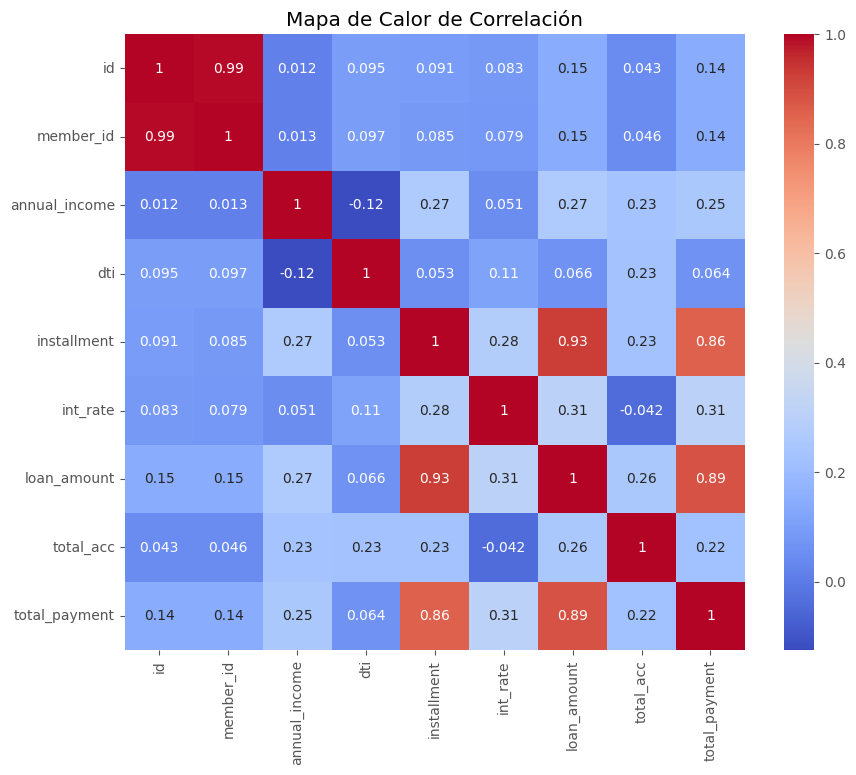

In [ ]:
# Seleccionamos solo las columnas numéricas para la matriz de correlación
numeric_df = df.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación
correlation_matrix = numeric_df.corr()

# Creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Este mapa de calor ilustra la correlación entre diversas variables financieras en nuestro dataset. Uno de los hallazgos más destacados es la fuerte correlación positiva entre el "loan amount" (monto del préstamo) y "installment" (cuota mensual). Esto indica que a medida que aumenta el monto del préstamo, también lo hace la cuota mensual, lo cual es intuitivamente esperable ya que préstamos mayores generalmente se asocian con pagos mensuales más altos para cubrir el principal y los intereses en el plazo acordado.


# 6.2. Distribución de Estados de Préstamos por Propósito de Solicitud


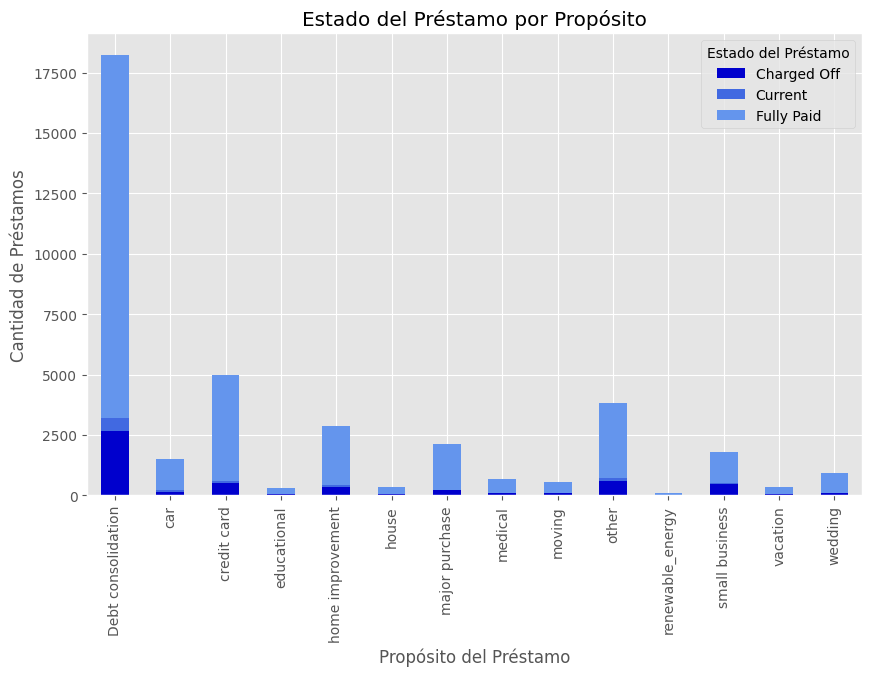

In [ ]:
loan_status_by_purpose = df.groupby(['purpose', 'loan_status']).size().unstack()
loan_status_by_purpose.plot(kind='bar', stacked=True, color=['mediumblue', 'royalblue', 'cornflowerblue'], figsize=(10, 6))
plt.title('Estado del Préstamo por Propósito')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Cantidad de Préstamos')
plt.legend(title='Estado del Préstamo')
plt.show()

Este gráfico de barras muestra la distribución del estado de los préstamos según el propósito de la solicitud. Los colores, que van del azul medio al azul oscuro, representan diferentes estados de los préstamos, permitiendo una visualización clara de la composición de estados para cada categoría de propósito.

Es notable que la consolidación de deudas (debt consolidation) es el propósito más común para solicitar un préstamo, lo que indica una tendencia predominante entre los solicitantes de utilizar nuevos préstamos para pagar deudas existentes. Esta observación puede ser crucial para las instituciones financieras, ya que sugiere una alta demanda de soluciones financieras orientadas a la gestión de deudas.

# 6.3. Comparación del Monto de Préstamos Según el Tipo de Propiedad del Solicitante



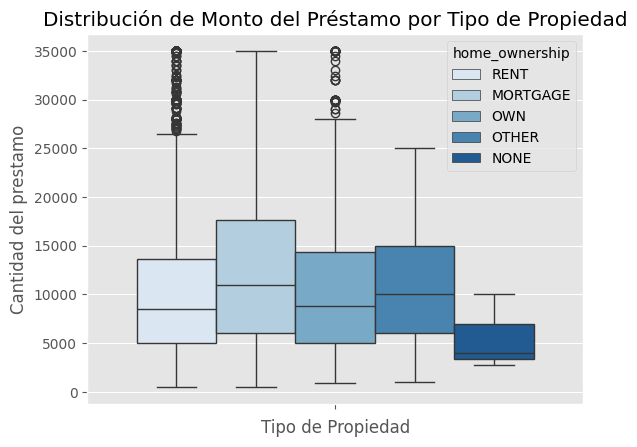

In [ ]:
sns.boxplot(hue='home_ownership', y='loan_amount', data=df, palette='Blues') #corregir hue
plt.title('Distribución de Monto del Préstamo por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad del prestamo')
plt.show()

Este gráfico de caja muestra cómo varía la cantidad de los préstamos otorgados en función del tipo de propiedad que poseen los solicitantes. Los diferentes tonos de azul representan distintas categorías de propiedad, facilitando la comparación visual entre grupos.

Es notable observar que los solicitantes con propiedad hipotecada tienden a recibir montos de préstamo más elevados. Esto podría reflejar una percepción de menor riesgo por parte de los prestamistas, dado que estos solicitantes ya han demostrado capacidad crediticia al mantener una hipoteca. Por otro lado, aquellos sin propiedad reciben, en promedio, los montos más bajos, posiblemente debido a un perfil de riesgo percibido más alto.

# 6.4. Análisis de la Distribución de Préstamos por Grado Crediticio y Estado del Préstamo

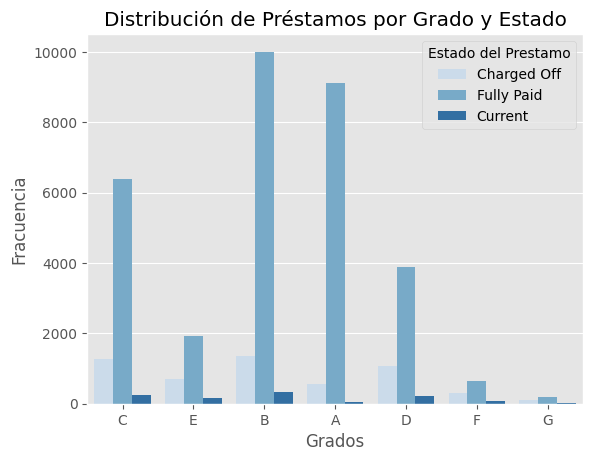

In [ ]:
sns.countplot(x='grade', hue='loan_status', data=df, palette='Blues')
plt.title('Distribución de Préstamos por Grado y Estado')
plt.xlabel('Grados')
plt.ylabel('Fracuencia')
plt.legend(title='Estado del Prestamo', title_fontsize='10')
plt.show()

Este gráfico de barras muestra la distribución de los préstamos otorgados, segmentados por grado crediticio y estado del préstamo, utilizando diferentes tonos de azul para diferenciar entre los distintos estados, como préstamos en curso, pagados o en mora. Observamos que los grados crediticios 'B' y 'A', que suelen asociarse con perfiles de riesgo más bajo y, posiblemente, con solicitantes de mayor poder adquisitivo, reciben la mayoría de los préstamos. Esto subraya una tendencia importante en las políticas de préstamo: las instituciones tienden a favorecer a aquellos que presentan menor riesgo según su calificación crediticia.


# 6.5. Comparación del Ingreso Anual Promedio Según el Grado Crediticio

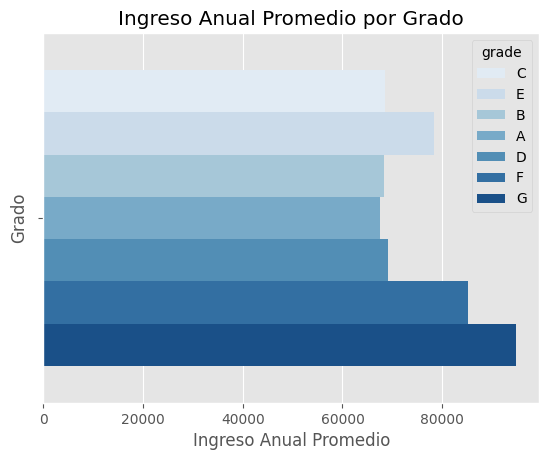

In [ ]:
sns.barplot(x='annual_income', hue='grade', data=df, errorbar=None, palette='Blues')
plt.title('Ingreso Anual Promedio por Grado')
plt.xlabel('Ingreso Anual Promedio')
plt.ylabel('Grado')
plt.show()

Este gráfico de barras proporciona una visualización clara de cómo varía el ingreso anual promedio de los solicitantes de préstamos en función de su grado crediticio, desde 'A' hasta 'G'. Utilizando una paleta de azules, cada barra representa un grado diferente, facilitando la comparación directa entre ellos.

Es notable observar que las personas clasificadas en el grado 'G', a pesar de estar consideradas como de mayor riesgo, tienden a reportar los ingresos anuales más altos. Esto podría indicar que los ingresos altos por sí solos no son un predictor confiable de la solvencia o del comportamiento de pago del prestatario, y que otros factores, posiblemente relacionados con la estabilidad financiera o el nivel de deudas existentes, también son importantes en la determinación del riesgo crediticio.


# 6.6 Distribución de Montos de Préstamo Según el Estado Actual del Préstamo

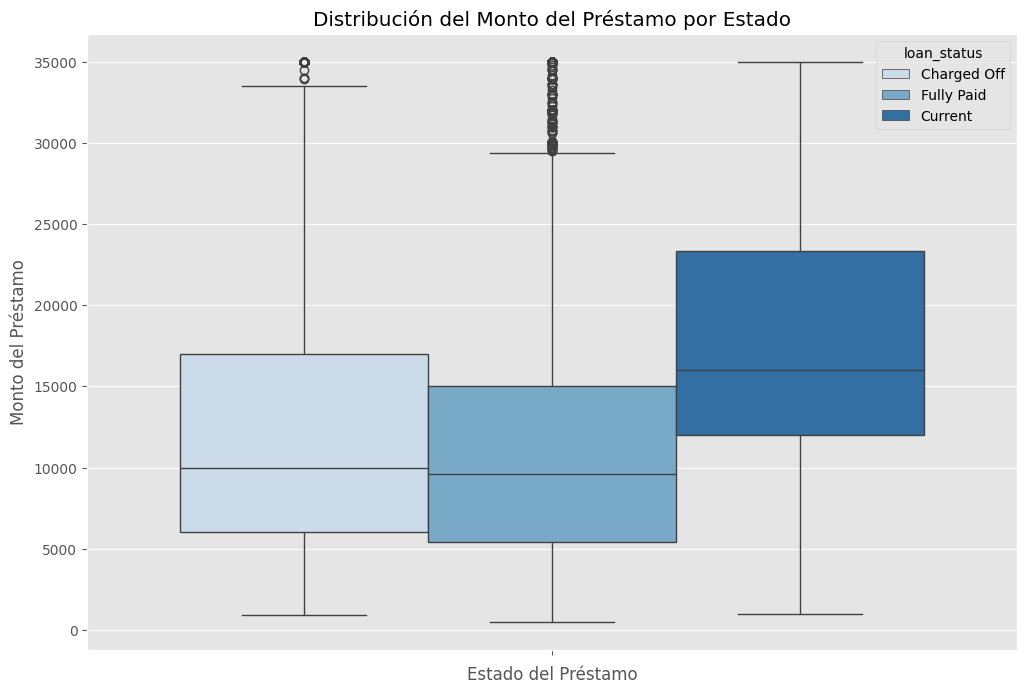

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(hue='loan_status', y='loan_amount', data=df, palette='Blues')
plt.title('Distribución del Monto del Préstamo por Estado')
plt.xlabel('Estado del Préstamo')
plt.ylabel('Monto del Préstamo')
plt.show()

Este gráfico de caja ilustra cómo varían los montos de los préstamos según el estado actual del préstamo, utilizando una paleta de azules para diferenciar visualmente entre los diferentes estados, como 'Corriente', 'Completamente Pagado', e 'Incobrable'. Cada caja representa la distribución del monto del préstamo dentro de un estado particular, destacando la mediana, los cuartiles y la presencia de valores atípicos.

Un hallazgo notable es que los préstamos en estado 'Corriente' tienden a tener una mediana más alta y un rango más amplio de montos comparado con otros estados. Esto sugiere que los préstamos que se mantienen activos y al día en pagos abarcan una variedad más grande de montos, incluyendo préstamos substanciales que aún están siendo amortizados.

#6.7. Distribución de los Estados de Préstamo en Porcentajes

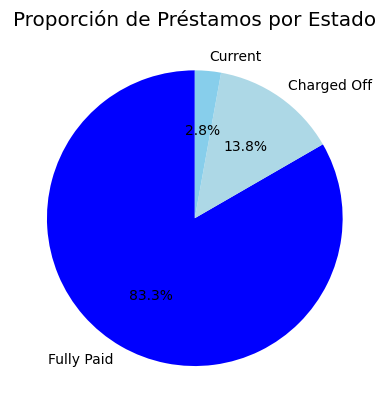

In [ ]:
var1 = df['loan_status'].value_counts()
plt.pie(var1, labels=var1.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue', 'skyblue'])
plt.title('Proporción de Préstamos por Estado')
plt.show()

Este gráfico de torta visualiza la distribución porcentual de los estados de los préstamos, utilizando una gama de tonos de azul para diferenciar entre las categorías. Cada segmento del pastel representa un estado diferente del préstamo, con etiquetas claras y porcentajes que facilitan la interpretación de los datos.

El análisis muestra que la gran mayoría de los préstamos en nuestro dataset han sido completamente pagados, lo cual es un indicador positivo de la salud financiera de los prestatarios y de las políticas de crédito de la institución. Sin embargo, un 13.8% de los préstamos se encuentra en estado de incobrabilidad, un porcentaje significativo que podría señalar áreas de preocupación y oportunidades para mejorar las estrategias de gestión de riesgos y recuperación de créditos. Además, el 2.8% de los préstamos aún están en estado corriente, reflejando aquellos que están activos y al día en sus pagos.

# 6.8. Histograma de la Distribución del Ratio Deuda-Ingreso (DTI) de los Prestatarios

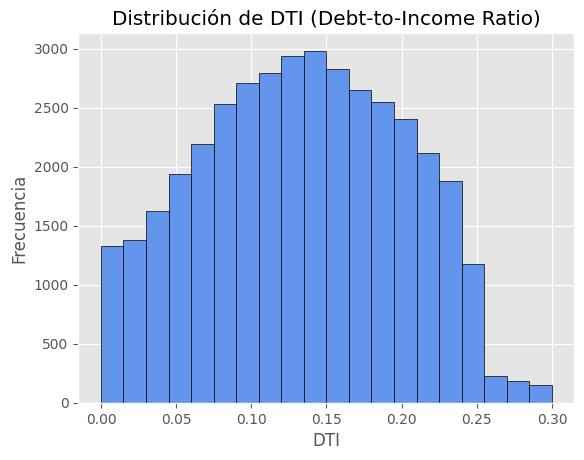

In [ ]:
plt.hist(df['dti'], bins=20, color='cornflowerblue', edgecolor='black')
plt.title('Distribución de DTI (Debt-to-Income Ratio)')
plt.xlabel('DTI')
plt.ylabel('Frecuencia')
plt.show()

Este histograma ilustra la distribución del ratio Deuda-Ingreso (DTI) entre los prestatarios, utilizando intervalos de bins para una mejor visualización de la frecuencia de cada rango de DTI. El color azul aciano facilita la visualización y el contraste de bordes negros ayuda a distinguir claramente cada bin.

A partir del gráfico, se observa que la frecuencia de los valores de DTI aumenta progresivamente hasta alcanzar un pico en 0.15, lo que sugiere que este es el valor más común de DTI entre los prestatarios. Después de este punto, la frecuencia comienza a decaer, indicando que valores más altos de DTI son menos comunes, con una disminución notable hasta un DTI de 0.30.

Este patrón puede indicar que la mayoría de los prestatarios tienen niveles de endeudamiento moderados en relación a sus ingresos, lo cual es un indicador favorable desde la perspectiva del riesgo crediticio. Sin embargo, la presencia de valores de DTI más altos hacia el extremo del espectro sugiere que una porción significativa de prestatarios podría estar enfrentando mayores cargas financieras en relación a sus ingresos, lo que podría aumentar el riesgo de incumplimiento.

# 7. Modelado con Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) se presenta como una herramienta estadística poderosa en este sentido, facilitando la reducción de dimensionalidad mientras se preserva la mayor cantidad de varianza posible en el dataset.

El objetivo principal de utilizar PCA en nuestro proyecto es identificar las direcciones en las que los datos varían más, con el fin de reducir el número de variables a considerar en nuestros modelos predictivos. Esto no solo mejora la eficiencia de los cálculos, sino que también ayuda a visualizar patrones subyacentes que podrían no ser aparentes en una representación de alta dimensionalidad.

In [ ]:
# Selecciona columnas numéricas
columnas_numericas = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
df_numericas = df[columnas_numericas]

# Entrenamiento
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_numericas)

modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pca_components_df = pd.DataFrame(
    data=modelo_pca.components_[:4, :],
    columns=df_numericas.columns,
    index=['PC1', 'PC2', 'PC3', 'PC4']
)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.4459985  0.16646872 0.16111746 0.11501595 0.0806711  0.0213232
 0.00940507]


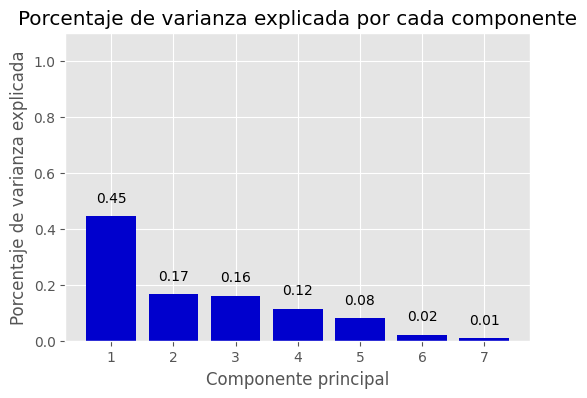

In [ ]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x=np.arange(len(modelo_pca.explained_variance_ratio_)) + 1,
    height=modelo_pca.explained_variance_ratio_,
    color='mediumblue'
)

for x, y in zip(np.arange(len(modelo_pca.explained_variance_ratio_)) + 1, modelo_pca.explained_variance_ratio_):
    label = "{:.2f}".format(y)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(len(modelo_pca.explained_variance_ratio_)) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza explicada')

plt.show()


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4459985  0.61246722 0.77358468 0.88860063 0.96927173 0.99059493
 1.        ]


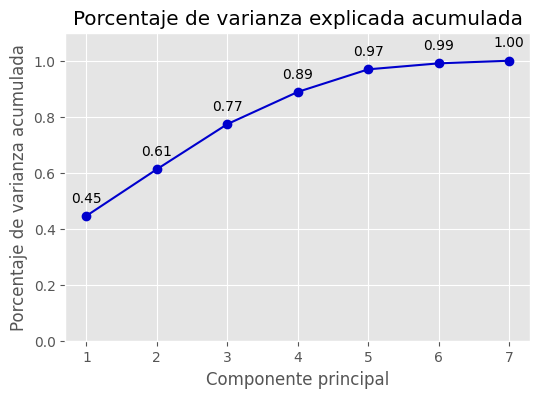

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(modelo_pca.explained_variance_ratio_)) + 1,
    prop_varianza_acum,
    marker='o',
    color='mediumblue'
)

for x, y in zip(np.arange(len(modelo_pca.explained_variance_ratio_)) + 1, prop_varianza_acum):
    label = "{:.2f}".format(y)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(len(modelo_pca.explained_variance_ratio_)) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada')

plt.show()

# 8. Modelos de Machine Learning

Accuracy: 0.8282789009849663
PC4: 0.3278966546058655
PC3: 0.23705735802650452
PC1: 0.23329897224903107
PC2: 0.2017471045255661


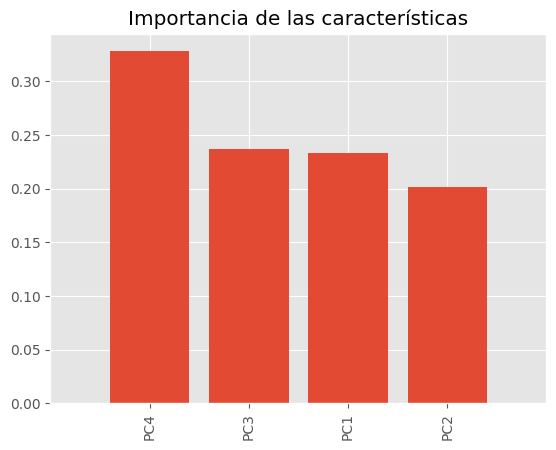

In [ ]:
# Selecciona columnas numéricas
columnas_numericas = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
df_numericas = df[columnas_numericas]

# Extraer etiquetas
y = df['loan_status']

# Codificar etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Estandarizar los datos
scaler = StandardScaler()
df_numericas_scaled = scaler.fit_transform(df_numericas)

# Aplicar PCA
pca = PCA(n_components=4)  # Mantener los primeros 4 componentes
df_pca = pca.fit_transform(df_numericas_scaled)

# Convertir los componentes principales en un df
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_pca, y_encoded, test_size=0.2, random_state=42)

# Definir el modelo XGBoost
xgb_model = XGBClassifier()

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Importancia de las características
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimir las características más importantes
for i in range(len(df_pca.columns)):
    print(f"{df_pca.columns[indices[i]]}: {importances[indices[i]]}")

# Graficar la importancia de las características
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(len(df_pca.columns)), importances[indices[:len(df_pca.columns)]], align="center")
plt.xticks(range(len(df_pca.columns)), [df_pca.columns[i] for i in indices[:len(df_pca.columns)]], rotation=90)
plt.xlim([-1, len(df_pca.columns)])
plt.show()


##Características Más Importantes:

1. home_ownership_MORTGAGE (9.98%): La característica más importante en tu modelo es la tenencia de la vivienda (hipoteca). Esto sugiere que el hecho de que alguien tenga una hipoteca es un factor clave para el modelo.
2. total_payment (9.53%): El pago total es la segunda característica más importante. Esto implica que el monto total pagado es crucial para las predicciones del modelo.
3. grade_C (7.36%): La calificación C también es una característica significativa, indicando que el modelo encuentra esta calificación relevante para sus predicciones.
4. home_ownership_RENT (7.09%): La opción de alquilar una vivienda también tiene una alta importancia.
5. loan_amount (6.24%): El monto del préstamo es otro factor importante, lo que sugiere que la cantidad del préstamo influye en la predicción del modelo.

In [ ]:
# Codificación de variables categóricas
columnas_categoricas = ['home_ownership', 'purpose', 'grade']
encoded_data = pd.get_dummies(df, columns=columnas_categoricas)

# División de los datos en conjuntos de entrenamiento y prueba
X = encoded_data.drop('loan_status', axis=1)
y = encoded_data['loan_status']

# Convertir etiquetas categóricas a numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminación de características no deseadas
unwanted_features = ['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
                     'issue_date', 'last_credit_pull_date', 'last_payment_date',
                     'next_payment_date', 'member_id', 'sub_grade', 'term',
                     'verification_status']
X_train = X_train.drop(columns=unwanted_features)
X_test = X_test.drop(columns=unwanted_features)

# Balanceo de clases
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Crear modelos individuales
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Ajuste de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
}

param_grid_xgb = {
    'n_estimators': [100, 150],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=10, cv=3, n_jobs=-1, random_state=42)

rf_search.fit(X_resampled, y_resampled)
xgb_search.fit(X_resampled, y_resampled)

best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

# Crear un modelo específico para la clase `Current`
#Se crea un modelo adicional de Random Forest con pesos específicos para cada clase, poniendo más peso en la clase 'Current' para ajustar el desequilibrio.
current_model = RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 5}, random_state=42)
current_model.fit(X_resampled, y_resampled)

voting_model = VotingClassifier(estimators=[('rf', best_rf), ('xgb', best_xgb), ('current', current_model)], voting='soft', weights=[1, 1, 2])

# Entrenar el modelo combinado
voting_model.fit(X_resampled, y_resampled)

# Evaluar el modelo
train_accuracy = voting_model.score(X_train, y_train)
test_accuracy = voting_model.score(X_test, y_test)

print("Precisión del modelo combinado en el conjunto de entrenamiento:", train_accuracy)
print("Precisión del modelo combinado en el conjunto de prueba:", test_accuracy)

# Predicciones estándar
y_pred = voting_model.predict(X_test)

# Convertir y_pred de vuelta a las etiquetas originales
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Precisión del modelo combinado en el conjunto de entrenamiento: 0.9852235904082955
Precisión del modelo combinado en el conjunto de prueba: 0.9245723172628305
Matriz de confusión:
[[ 778    3  283]
 [   0   37  193]
 [  20   83 6319]]

Reporte de clasificación:
              precision    recall  f1-score   support

 Charged Off       0.97      0.73      0.84      1064
     Current       0.30      0.16      0.21       230
  Fully Paid       0.93      0.98      0.96      6422

    accuracy                           0.92      7716
   macro avg       0.74      0.63      0.67      7716
weighted avg       0.92      0.92      0.92      7716



In [ ]:
# Contar el número de muestras en cada clase
counter = Counter(y_resampled)
print(counter)

Counter({1: 25277, 0: 25172, 2: 24784})


In [ ]:
# Codificación de variables categóricas
columnas_categoricas = ['home_ownership', 'purpose', 'grade']
encoded_data = pd.get_dummies(df, columns=columnas_categoricas)

# División de los datos en conjuntos de entrenamiento y prueba
X = encoded_data.drop('loan_status', axis=1)
y = encoded_data['loan_status']

# Convertir etiquetas categóricas a numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminación de características no deseadas
unwanted_features = ['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
                     'issue_date', 'last_credit_pull_date', 'last_payment_date',
                     'next_payment_date', 'member_id', 'sub_grade', 'term',
                     'verification_status']
X_train = X_train.drop(columns=unwanted_features)
X_test = X_test.drop(columns=unwanted_features)

# Balanceo de clases
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Verificar el número de muestras en cada clase
counter = Counter(y_resampled)
print(counter)

# Aplicar SMOTE solo a la clase Current con una cantidad ajustada
current_class_count = counter[2]  # La clase 'Current' tiene el índice ""2"""
desired_current_class_count = 35000  # Ajustar según sea necesario

smote = SMOTE(sampling_strategy={2: desired_current_class_count}, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Crear modelos individuales
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Ajuste de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
}

param_grid_xgb = {
    'n_estimators': [100, 150],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=10, cv=3, n_jobs=-1, random_state=42)

rf_search.fit(X_resampled_smote, y_resampled_smote)
xgb_search.fit(X_resampled_smote, y_resampled_smote)

best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

# Crear un modelo específico para la clase `Current`
current_model = RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 5}, random_state=42)
current_model.fit(X_resampled_smote, y_resampled_smote)

# Crear el VotingClassifier con los mejores modelos
voting_model = VotingClassifier(estimators=[('rf', best_rf), ('xgb', best_xgb), ('current', current_model)], voting='soft', weights=[1, 1, 2])

# Entrenar el modelo combinado
voting_model.fit(X_resampled_smote, y_resampled_smote)

# Evaluar el modelo
train_accuracy = voting_model.score(X_train, y_train)
test_accuracy = voting_model.score(X_test, y_test)

print("Precisión del modelo combinado en el conjunto de entrenamiento:", train_accuracy)
print("Precisión del modelo combinado en el conjunto de prueba:", test_accuracy)

# Predicciones estándar
y_pred = voting_model.predict(X_test)

# Convertir y_pred de vuelta a las etiquetas originales
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Counter({1: 25277, 0: 25172, 2: 24784})
Precisión del modelo combinado en el conjunto de entrenamiento: 0.9901166558651977
Precisión del modelo combinado en el conjunto de prueba: 0.921461897356143
Matriz de confusión:
[[ 783    7  274]
 [   0   43  187]
 [  26  112 6284]]

Reporte de clasificación:
              precision    recall  f1-score   support

 Charged Off       0.97      0.74      0.84      1064
     Current       0.27      0.19      0.22       230
  Fully Paid       0.93      0.98      0.95      6422

    accuracy                           0.92      7716
   macro avg       0.72      0.63      0.67      7716
weighted avg       0.92      0.92      0.92      7716



_________________________________________________________________________________

Nombres de las columnas del DataFrame:
Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')
Columnas 'loan_amnt' o 'annual_inc' no encontradas.
Columnas 'int_rate' o 'annual_inc' no encontradas.
Counter({1: 25277, 0: 25172, 2: 24784})
Precisión del modelo combinado en el conjunto de entrenamiento: 0.9901166558651977
Precisión del modelo combinado en el conjunto de prueba: 0.921461897356143
Matriz de confusión:
[[ 783    7  274]
 [   0   43  187]
 [  26  112 6284]]

Reporte de clasificación:
              precision    recall  f1-score   support

 Charged Off       0.97      0.74      0.84      1064
     Current       0.27   

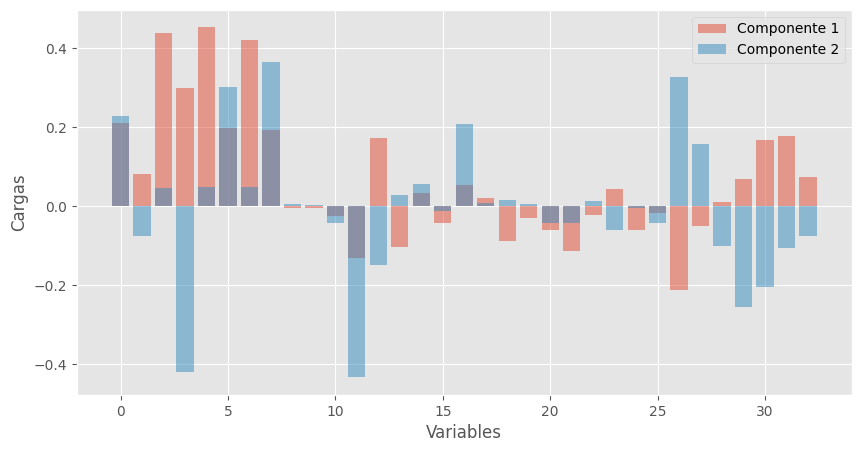

In [ ]:
# Imprimir nombres de las columnas para verificación
print("Nombres de las columnas del DataFrame:")
print(df.columns)

# Codificación de variables categóricas
columnas_categoricas = ['home_ownership', 'purpose', 'grade']
encoded_data = pd.get_dummies(df, columns=columnas_categoricas)

# Crear variables sintéticas adicionales (asegurarse de que las columnas existan)
if 'loan_amnt' in encoded_data.columns and 'annual_inc' in encoded_data.columns:
    encoded_data['loan_amnt_to_income'] = encoded_data['loan_amnt'] / (encoded_data['annual_inc'] + 1)
else:
    print("Columnas 'loan_amnt' o 'annual_inc' no encontradas.")

if 'int_rate' in encoded_data.columns and 'annual_inc' in encoded_data.columns:
    encoded_data['int_rate_to_income'] = encoded_data['int_rate'] / (encoded_data['annual_inc'] + 1)
else:
    print("Columnas 'int_rate' o 'annual_inc' no encontradas.")

# División de los datos en conjuntos de entrenamiento y prueba
X = encoded_data.drop('loan_status', axis=1)
y = encoded_data['loan_status']

# Convertir etiquetas categóricas a numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminación de características no deseadas
unwanted_features = ['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
                     'issue_date', 'last_credit_pull_date', 'last_payment_date',
                     'next_payment_date', 'member_id', 'sub_grade', 'term',
                     'verification_status']
X_train = X_train.drop(columns=unwanted_features, errors='ignore')
X_test = X_test.drop(columns=unwanted_features, errors='ignore')

# Balanceo de clases usando SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Verificar el número de muestras en cada clase
counter = Counter(y_resampled)
print(counter)

# Aplicar SMOTE solo a la clase Current con una cantidad ajustada
current_class_count = counter[2]  # La clase 'Current' tiene el índice 2
desired_current_class_count = 35000  # Ajustar según sea necesario

smote = SMOTE(sampling_strategy={2: desired_current_class_count}, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Crear modelos individuales
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Ajuste de hiperparámetros con RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
}

param_grid_xgb = {
    'n_estimators': [100, 150],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=10, cv=3, n_jobs=-1, random_state=42)

rf_search.fit(X_resampled_smote, y_resampled_smote)
xgb_search.fit(X_resampled_smote, y_resampled_smote)

best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

# Crear un modelo específico para la clase `Current`
current_model = RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 5}, random_state=42)
current_model.fit(X_resampled_smote, y_resampled_smote)

# Crear el VotingClassifier con los mejores modelos
voting_model = VotingClassifier(estimators=[('rf', best_rf), ('xgb', best_xgb), ('current', current_model)], voting='soft', weights=[1, 1, 2])

# Entrenar el modelo combinado
voting_model.fit(X_resampled_smote, y_resampled_smote)

# Evaluar el modelo
train_accuracy = voting_model.score(X_train, y_train)
test_accuracy = voting_model.score(X_test, y_test)

print("Precisión del modelo combinado en el conjunto de entrenamiento:", train_accuracy)
print("Precisión del modelo combinado en el conjunto de prueba:", test_accuracy)

# Predicciones con umbral estándar
y_pred = voting_model.predict(X_test)

# Convertir y_pred de vuelta a las etiquetas originales
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Realizar PCA y explorar las cargas de los primeros 2 componentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled_smote)

pca = PCA(n_components=2)
pca.fit(X_scaled)

pca_components = pca.components_
pca_variance = pca.explained_variance_ratio_

# Imprimir las cargas de los primeros 2 componentes
print("\nCargas de los primeros 2 componentes:")
for i in range(pca_components.shape[1]):
    print(f"Variable {i+1}: Componente 1 = {pca_components[0, i]}, Componente 2 = {pca_components[1, i]}")

print("\nVarianza explicada por los primeros 2 componentes:")
print(f"Componente 1: {pca_variance[0]}")
print(f"Componente 2: {pca_variance[1]}")

# Graficar las cargas de los primeros 2 componentes
plt.figure(figsize=(10, 5))
plt.bar(range(pca_components.shape[1]), pca_components[0], alpha=0.5, label='Componente 1')
plt.bar(range(pca_components.shape[1]), pca_components[1], alpha=0.5, label='Componente 2')
plt.xlabel('Variables')
plt.ylabel('Cargas')
plt.legend()
plt.show()


In [ ]:
# Crear variables sintéticas
encoded_data['loan_amnt_to_income'] = encoded_data['loan_amount'] / (encoded_data['annual_income'] + 1)
encoded_data['int_rate_to_income'] = encoded_data['int_rate'] / (encoded_data['annual_income'] + 1)
encoded_data['installment_to_income'] = encoded_data['installment'] / (encoded_data['annual_income'] + 1)

# Verificar
print(encoded_data[['loan_amnt_to_income', 'int_rate_to_income', 'installment_to_income']].head())



   loan_amnt_to_income  int_rate_to_income  installment_to_income
0             0.083331        5.089830e-06               0.001994
1             0.062499        3.883252e-06               0.002280
2             0.239995        3.191936e-06               0.008433
3             0.107140        2.535654e-06               0.002311
4             0.042168        7.264973e-07               0.001283


In [ ]:
# Definir los modelos
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

# Probar
for model_name, config in models.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")


Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.9240440699935192
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9243357096565132
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 200}
Best cross-validation accuracy for Gradient Boosting: 0.9374918988982502


In [ ]:
# Codificación de variables categóricas
columnas_categoricas = ['home_ownership', 'purpose', 'grade']
encoded_data = pd.get_dummies(df, columns=columnas_categoricas)

# Crear variables sintéticas adicionales
encoded_data['loan_amnt_to_income'] = encoded_data['loan_amount'] / (encoded_data['annual_income'] + 1)
encoded_data['int_rate_to_income'] = encoded_data['int_rate'] / (encoded_data['annual_income'] + 1)
encoded_data['installment_to_income'] = encoded_data['installment'] / (encoded_data['annual_income'] + 1)

# División de los datos en conjuntos de entrenamiento y prueba
X = encoded_data.drop('loan_status', axis=1)
y = encoded_data['loan_status']

# Convertir etiquetas categóricas a numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminación de características no deseadas
unwanted_features = ['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
                     'issue_date', 'last_credit_pull_date', 'last_payment_date',
                     'next_payment_date', 'member_id', 'sub_grade', 'term',
                     'verification_status']
X_train = X_train.drop(columns=unwanted_features, errors='ignore')
X_test = X_test.drop(columns=unwanted_features, errors='ignore')

# Balanceo de clases usando SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Verificar el número de muestras en cada clase
counter = Counter(y_resampled)
print(counter)

# Aplicar SMOTE solo a la clase Current con una cantidad ajustada
current_class_count = counter[2]  # La clase 'Current' tiene el índice 2
desired_current_class_count = 35000  # Ajustar según sea necesario

smote = SMOTE(sampling_strategy={2: desired_current_class_count}, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_resampled, y_resampled)

# Definir el modelo con los mejores hiperparámetros encontrados anteriormente
best_rf = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Realizar validación cruzada
cv_scores = cross_val_score(best_rf, X_resampled_smote, y_resampled_smote, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Scores de validación cruzada:", cv_scores)
print("Precisión promedio de validación cruzada:", np.mean(cv_scores))


Counter({1: 25277, 0: 25172, 2: 24784})
Scores de validación cruzada: [0.93458163 0.98209479 0.98133411 0.97442949 0.92515653]
Precisión promedio de validación cruzada: 0.9595193113696132


In [ ]:
# Entrenar el modelo con el conjunto de entrenamiento resampleado
best_rf.fit(X_resampled_smote, y_resampled_smote)

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados de la evaluación
print("Exactitud en el conjunto de prueba:", accuracy)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nInforme de clasificación:\n", class_report)

# Mostrar las predicciones individuales
print("Predicciones:", y_pred)


Exactitud en el conjunto de prueba: 0.9252203214100571

Matriz de confusión:
 [[ 796    3  265]
 [   0   29  201]
 [  31   77 6314]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      1064
           1       0.27      0.13      0.17       230
           2       0.93      0.98      0.96      6422

    accuracy                           0.93      7716
   macro avg       0.72      0.62      0.66      7716
weighted avg       0.92      0.93      0.92      7716

Predicciones: [2 2 2 ... 2 2 2]


El modelo tiene una exactitud del 92.52% en el conjunto de prueba, lo que indica que la mayoría de las predicciones son correctas.
Tiene una presicion alta para la clase 0 y 2, pero baja para la clase 1. Esto no es problema ya que la clase que buscamos predecir en la clase 0, "Charged Off", que nos permite conocer quienes seran nuestro futuros deudores.

AUC Score: 0.9415604994265138


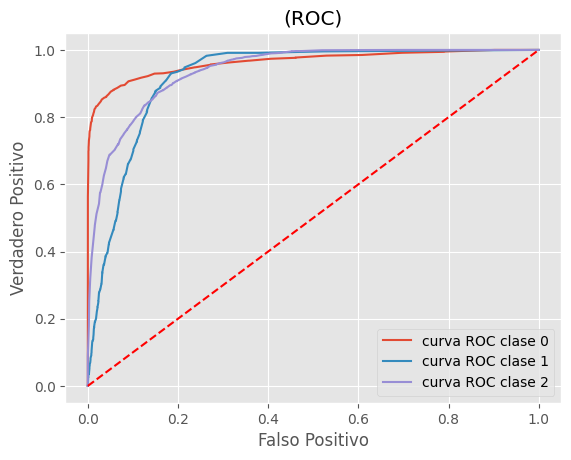

In [ ]:
# Entrenar el modelo
best_rf.fit(X_resampled_smote, y_resampled_smote)

# Obtener las probabilidades de predicción para el conjunto de prueba
y_prob = best_rf.predict_proba(X_test)

# Binarizar las etiquetas
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcular el AUC para cada clase
auc_score = roc_auc_score(y_test_binarized, y_prob, average='macro', multi_class='ovr')
print(f'AUC Score: {auc_score}')

# graficar la curva ROC
plt.figure()
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'curva ROC clase {i}')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('(ROC)')
plt.legend(loc='lower right')
plt.show()

#9. Conclusión del Proyecto de Evaluación de Riesgo Crediticio


En este proyecto, se logró utilizar de manera efectiva el conjunto de datos para evaluar el riesgo crediticio asociado con los solicitantes de préstamos, lo cual permitió predecir la probabilidad de incumplimiento del préstamo basándonos en una diversidad de características financieras. Los resultados de nuestra modelización ofrecen percepciones importantes:

Precisión General del Modelo: El modelo demostró una alta precisión, alcanzando un 92,52% en la prediccion, lo que indica una robustez considerable en la identificación de los prestatarios que probablemente incumplirán con sus obligaciones de préstamo.

Desbalance de Clases: Se identificó un desbalance significativo en las clases, particularmente en la clase "Current", que presentó un número menor de instancias. Pero este desbalance no influye en la capacidad del modelo para generalizar eficazmente la categoria del préstamo.

